### Problem Set 2

#### Name: Zunda Xu ( zunda@uchicago.edu )

### Pandas 3 Group 

In [45]:
from pydataset import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### Problem 1

In [11]:
iris = data("iris")

In [12]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


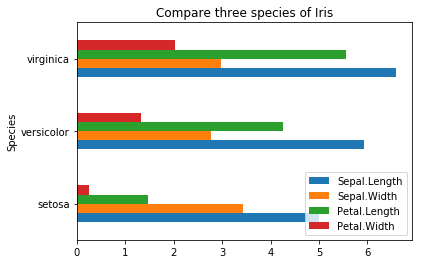

In [13]:
iris_species = iris.groupby("Species")
iris_species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind = "barh")
plt.title("Compare three species of Iris")
plt.show()

From the graph above, we notice that setosa has the smallest petal width and petal length compared with other two species, so setaso is the easiest to distinguish

The strategy are as follows:

If the flower has significantly smaller petal width and petal length, it tends to be setosa, while if the flower has larger sepal lenth and larger petal lenth, it tends to be virginica. Otherwise it will be versicolor.

In [14]:
poisons = data("poisons")
poisons.head()

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A


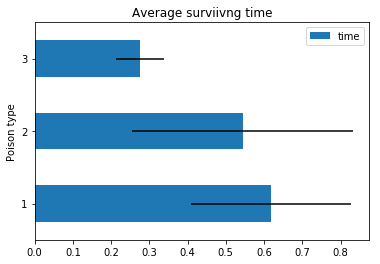

In [16]:
groupby_poisons = poisons.groupby("poison")
groupby_poisons["time"].mean().plot(kind= "barh", xerr = groupby_poisons.std(), legend = True)
plt.ylabel("Poison type")
plt.title("Average surviivng time")
plt.show()

From the graph shown above, we can see that poison type 3 is the most effective.

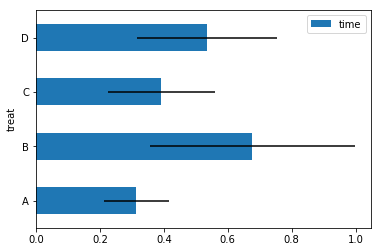

In [18]:
poison_by_treat = poisons.groupby("treat")
poison_by_treat["time"].mean().plot(kind= "barh", xerr = poison_by_treat.std(), legend = True)
plt.show()

From the graph shown above, we can see that treatment B is the most effective.

In [20]:
poi_1 = poisons.groupby("poison").get_group(1)
poi_2 = poisons.groupby("poison").get_group(2)
poi_3 = poisons.groupby("poison").get_group(3)
poi_1_treat = poi_1.groupby("treat")
poi_2_treat = poi_2.groupby("treat")
poi_3_treat = poi_3.groupby("treat")

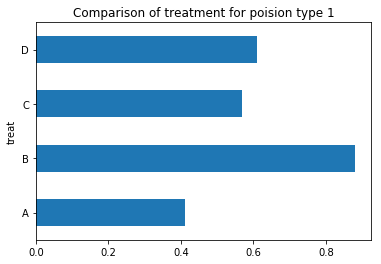

In [21]:
poi_1_treat["time"].mean().plot(kind = "barh", title = "Comparison of treatment for poision type 1")
plt.show()

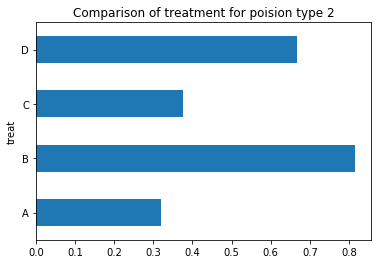

In [22]:
poi_2_treat["time"].mean().plot(kind = "barh", title = "Comparison of treatment for poision type 2")
plt.show()

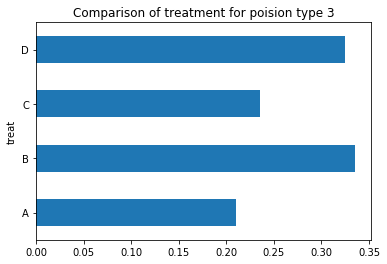

In [23]:
poi_3_treat["time"].mean().plot(kind = "barh", title = "Comparison of treatment for poision type 3")
plt.show()

If we don't know the type of poison, treatment B would be the best choice.
If it is poison type 1, one should choose treatment B.
If it is poison type 2, one should still choose treatment B.
If it is poison type 3, treatment B and treatment D are better choice.

In [24]:
diamonds  = data("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/Users/winston/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


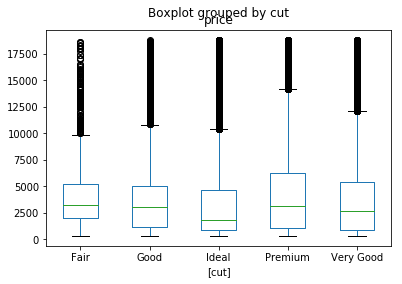

In [25]:
diamonds.boxplot(["price"], by=["cut"], grid = False)
plt.show()

/Users/winston/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


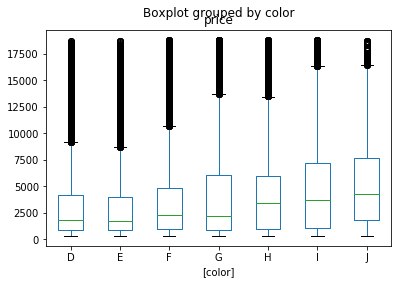

In [26]:
diamonds.boxplot(["price"], by=["color"], grid = False)
plt.show()

It is hard to conclude since both of them have many outliers. However, we can still see that better color and better cut yield heigher prices.

In [27]:
diamond_c = diamonds.groupby("color").get_group("H")
diamond_c_f = diamond_c.groupby("cut").get_group("Fair")
diamond_c_s = diamond_c.groupby("cut").get_group("Ideal")
print("Average size of color H diamonds with fair cut: ", diamond_c_f["carat"].mean())
print("Average size of color H diamonds with ideal cut: ", diamond_c_s["carat"].mean())

Average size of color H diamonds with fair cut:  1.2191749174917463
Average size of color H diamonds with ideal cut:  0.7995248796147678


Therefore, the reason that the first categoty generally sells higher prices is that such diamonds are by nature larger.

#### Problem 3

In [29]:
npk = data("npk")
npk.head()

,block,N,P,K,yield
1,1,0,1,1,49.5
2,1,1,1,0,62.8
3,1,0,0,0,46.8
4,1,1,0,1,57.0
5,2,1,0,0,59.8


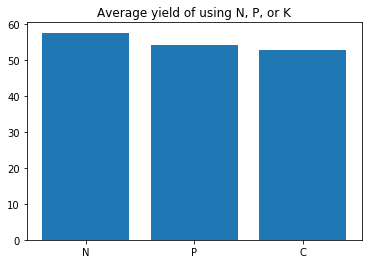

In [30]:
npk_n = npk[npk["N"]==1]
npk_p = npk[npk["P"]==1]
npk_k = npk[npk["K"]==1]
plt.bar(x=["N","P","C"], height = [npk_n["yield"].mean(), npk_p["yield"].mean(), npk_k["yield"].mean()])
plt.title("Average yield of using N, P, or K")
plt.show()

From the graph above, we note that Nitrogen is the most effective one.

In [31]:
npk_prime = npk.pivot_table(values = "yield", index = ["N", "P", "K"])
npk_prime

yield
N P K           
0 0 0  51.433333
    1  52.000000
  1 0  54.333333
    1  50.500000
1 0 0  63.766667
    1  54.666667
  1 0  57.933333
    1  54.366667

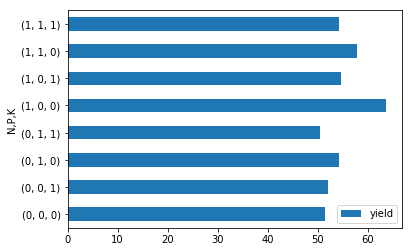

In [33]:
npk_prime.plot(kind = "barh")
plt.show()

From the graph above, we find using only nitrogen is the best. Using both P and K is the worst.

In [35]:
swiss = data("swiss")
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


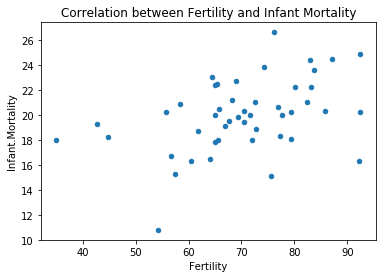

In [36]:
swiss.plot(kind = "scatter", x = "Fertility", y="Infant.Mortality")
plt.title("Correlation between Fertility and Infant Mortality")
plt.show()

In general, fertility and infant mortality are positively correlated.

In [43]:
cath = pd.cut(swiss["Catholic"], np.arange(0, 110, 10))
swiss.pivot_table(values = [ "Fertility"], index = cath)

,Fertility
Catholic,
"(0, 10]",67.895000
"(10, 20]",62.233333
"(20, 30]",68.300000
"(30, 40]",85.800000
"(40, 50]",35.000000
"(50, 60]",43.750000
"(60, 70]",NaN
"(70, 80]",NaN
"(80, 90]",83.100000


Hence, provinces that are highly catholic tend to have higher fertility

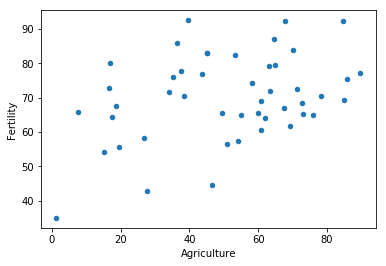

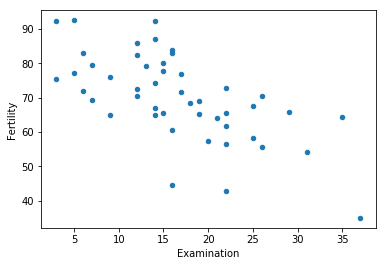

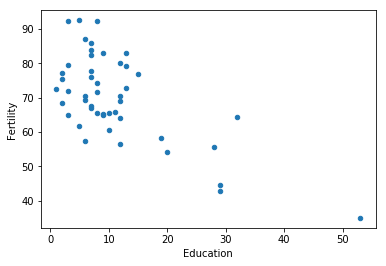

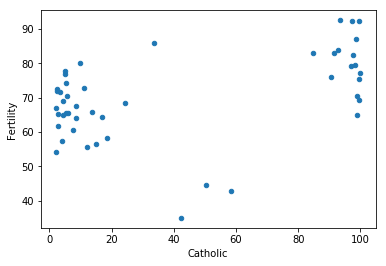

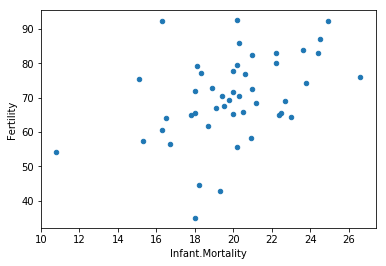

In [46]:
swiss.plot( y = "Fertility", x = "Agriculture", kind = "scatter")
swiss.plot( y = "Fertility", x = "Examination", kind = "scatter")
swiss.plot( y = "Fertility", x = "Education", kind = "scatter")
swiss.plot( y = "Fertility", x = "Catholic", kind = "scatter")
swiss.plot( y = "Fertility", x = "Infant.Mortality", kind = "scatter")

From the graph shown above, mortality and agriculture are the most important factors for predicting fertility